In [196]:
import pandas as pd
import numpy as np
import sklearn
import pmdarima as pmd
import matplotlib.pyplot as plt
import seaborn as sns

In [355]:
ap=pmd.datasets.load_airpassengers()
ab=pmd.datasets.load_ausbeer()
at=pmd.datasets.load_austres()
gas=pmd.datasets.load_gasoline()
heart=pmd.datasets.load_heartrate()
lynx=pmd.datasets.load_lynx()
msft=pmd.datasets.load_msft()
sun=pmd.datasets.load_sunspots()
taylor=pmd.datasets.load_taylor()
wine=pmd.datasets.load_wineind()
wool=pmd.datasets.load_woolyrnq()

In [356]:
ap=pd.Series(ap)

In [366]:
log_ap=np.log(ap)

In [367]:
arim=pmd.AutoARIMA()
arim.fit(log_ap)
arim.summary()
df1=pd.DataFrame((arim.predict(n_periods=24,return_conf_int=True,alpha=.25)))

In [205]:
# pd.DataFrame(arim.predict(n_periods=24,return_conf_int=True,alpha=.05)).T

In [368]:

df2=df1.T
df2.columns=['pred','conf']

In [369]:
df2['conf'].explode()
df3=pd.DataFrame(df2['conf'].values.tolist())
df=pd.merge(df2,df3,left_index=True,right_index=True)
df.drop('conf',axis=1,inplace=True)
df.columns=['pred','low_pred','high_pred']
df.index=list(range(144,144+24))
df

,pred,low_pred,high_pred
144,6.22772,6.133463,6.321973
145,6.30472,6.166084,6.443349
146,6.40332,6.246279,6.560368
147,6.4298,6.268896,6.590703
148,6.34542,6.182669,6.508167
149,6.31626,6.146711,6.485813
150,6.30201,6.129446,6.474576
151,6.26293,6.089056,6.436813
152,6.30816,6.134247,6.482069
153,6.36397,6.187496,6.540452


In [361]:
act=pd.DataFrame(ap,columns=['actuals'])

In [397]:
fin_df=pd.concat((act,df),ignore_index=False)    
fin_df.fillna(0,inplace=True)
fin_df['pred_exp']=np.exp(fin_df['pred'])
fin_df['low_exp']=np.exp(fin_df['low_pred'])
fin_df['high_exp']=np.exp(fin_df['high_pred'])
fin_df.drop(['pred','low_pred','high_pred'],axis=1,inplace=True)
fin_df.replace(to_replace=1,value=np.nan,inplace=True)
fin_df.replace(to_replace=0,value=np.nan,inplace=True)
fin_df

,actuals,pred_exp,low_exp,high_exp
0,112.0,NaN,NaN,NaN
1,118.0,NaN,NaN,NaN
2,132.0,NaN,NaN,NaN
3,129.0,NaN,NaN,NaN
4,121.0,NaN,NaN,NaN
...,...,...,...,...
163,NaN,635.108837,530.278171,760.663473
164,NaN,649.115202,541.931980,777.497104
165,NaN,661.749789,552.379555,792.775148
166,NaN,654.698198,546.491945,784.329457


In [398]:
plt.style.use('seaborn')

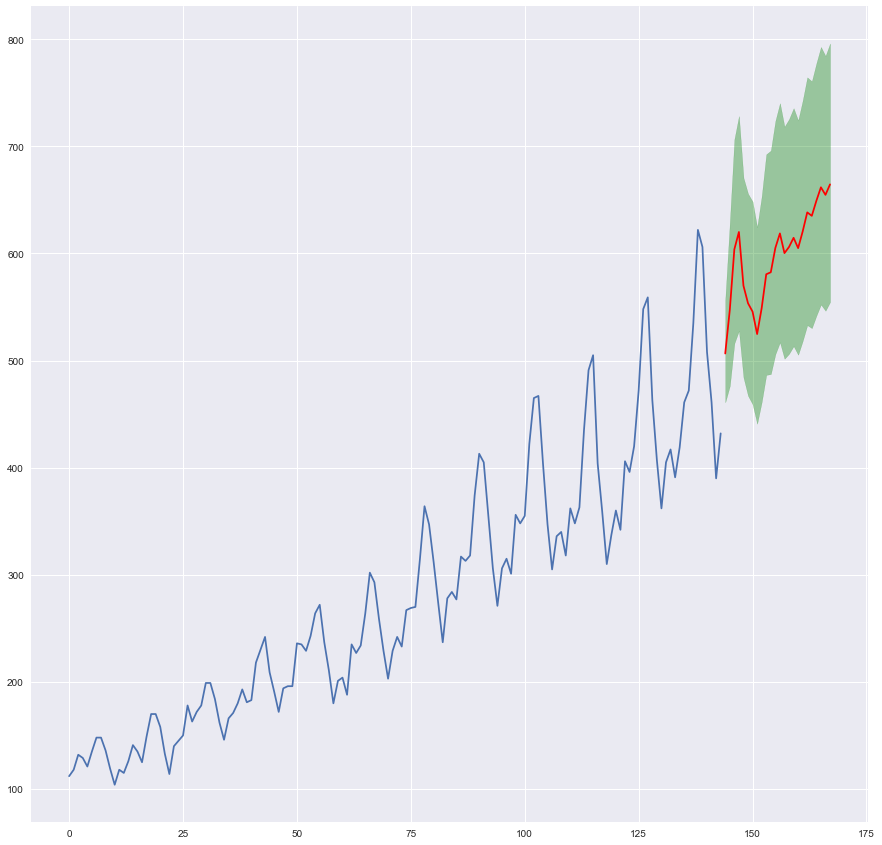

In [399]:
plt.figure(figsize=(15,15))
plt.plot(fin_df.index,fin_df['actuals'])
plt.plot(fin_df.index,fin_df['pred_exp'],color='r')
plt.fill_between(fin_df.index,fin_df['low_exp'],fin_df['high_exp'],alpha=.35,color='g')
plt.show()


0.0175